# Content

### 1. Mean
### 2. Median
### 3. Mode
### 4. Variance
### 5. Standard Deviation
### 6. Correlation (Pearson and Spearman)
### 7. Normal Distribution
### 8. Log  Normal Distribution
### 9. Pareto Distribution
### 10. Skewness and its effect on mean, median, and mode
### 11. QQ Plot
### 12. Box Cox Transformation

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df=pd.read_csv("data.csv")

**df.head():** Returns the first n (default 5) rows for the object based on position. It is helpful in checking if the object has the right type of data in it.

For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n].

In [93]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


**df.describe():** It provides descriptive statistics summarizing the central tendency, dispersion and shape of a dataset’s distribution, **excluding NaN values**.

It Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

<font color="blue">*Syntax: DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)*</font>

In [94]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


# Measures of Central Tendencies

While measuring central tendency of a variable, we look at the data with the following techniques

1. Mean
2. Median
3. Mode

## Mean (Arithmetic Mean)

>**Mean is the average of the group of numbers, in other words, mean is the sum of numbers in the group divided by the count of the total numbers in the group.**

**Mean:** $$ \mu= \frac{1}{N} \sum_{i=1}^N x_i = \frac{x_1+x_2+x_3+....x_i}{n}$$

Where, 

**$\mu$** = Mean 

**N**= Total numbers in the set.

**$x_i$** = data values

>Example: Arithmetic Mean of 142, 150, 149, 156, 153, 155, 162, 168, 170, 175 

                        Mean of the given data=
$$ \frac{142 + 150 + 149 + 156 + 153 + 155 + 162 + 168 + 170 + 175} {10} = 158 $$


In [95]:
# Example: Mean of the column "Mthly_HH_Income" in the given dataset
mean=sum(df["Mthly_HH_Income"])/len(df["Mthly_HH_Income"])

print (mean)

41558.0


## Median

>**The value of the middlemost observation, obtained after arranging the data in ascending order, is called the median of the data.**

>**For example, consider the data: 4, 4, 6, 3, 2. Let's arrange this data in ascending order: 2, 3, 4, 4, 6. There are 5 observations. Thus, median = middle value i.e. 4. We can see here: 2, 3, 4, 4 , 6 (Thus, 4 is the median).**

*Step 1*:

Sort all the values in ascending or descending order.

*Step 2*:

If the total number in the sets i.e.,  n is odd then use:

$$ Median = \frac{(n+1)}{2}^{th} observation $$

If the total number of observations i.e., n is even then use:


$$ Median = \frac{\frac{n}{2}^{th} + \frac{(n+1)}{2}^{th} observation }{2}$$
         


![title.jpeg](https://miro.medium.com/max/1838/1*tzWMWXyEYvz1K5qYy_63Jg.png)          


[Source: TowardsDataScience]

In [96]:
#step 1: sort the values
sorted_values = sorted(df["Mthly_HH_Income"])
#step 2:
n = len(df["Mthly_HH_Income"])

#n =50 which is even so we use even method
if n % 2 == 0:
    a = sorted_values[n//2] #n/2th term
    b = sorted_values[n//2-1] #n
    median=(a+b)/2 
else:
    median=sorted_values[n//2]

print(median)

35000.0


In [97]:
# Using inbuilt function
df["Mthly_HH_Income"].median()

35000.0

## Mode
>**The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all.**

>**Mode is most useful as a measure of central tendency when examining categorical data, such as models of cars or flavors of soda, for which a mathematical average median value based on ordering can not be calculated.**

For the normal distribution, the mode is also the same value as the mean and median.
In many cases, the modal value will differ from the average value in the data.

**A set of numbers can have more than one mode (this is known as bimodal if there are two modes) if there are multiple numbers that occur with equal frequency, and more times than the others in the set.**

Example: 3, 3, 3, 9, 16, 16, 16, 27, 37, 48

Here Both the number 3 and the number 16 are modes as they each occur three times and no other number occurs more often.

If no number in a set of numbers occurs more than once, that set has no mode:

3, 6, 9, 16, 27, 37, 48

A set of numbers with two modes is bimodal, a set of numbers with three modes is trimodal, and any set of numbers with more than one mode is multimodal.


**Advantages and Disadvantages of the Mode**

**Advantages:**
1. The mode is easy to understand and calculate.
2. The mode is not affected by extreme values.
3. The mode is easy to identify in a data set and in a discrete frequency distribution.
4. The mode is useful for qualitative data.
5. The mode can be computed in an open-ended frequency table.
6. The mode can be located graphically.

**Disadvantages:**
1. The mode is not defined when there are no repeats in a data set.
2. The mode is not based on all values.
3. The mode is unstable when the data consist of a small number of values.
4. Sometimes data have one mode, more than one mode, or no mode at all.

source: https://www.investopedia.com/terms/m/mode.asp


![title.jpeg](https://qph.fs.quoracdn.net/main-qimg-40fe0ba2333992abb8568de0da740c52-c)

In [99]:
def mode(x):
    freq={}
    for i in sorted(x):
        freq.setdefault(i,0)
        freq[i]+=1
    
    for key,value in freq.items():
        if value == max(freq.values()):
            freq_val = key
    return freq_val

mode(df["Mthly_HH_Income"])

45000

In [100]:
# Using inbuilt function
df.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


## Pros and Cons of Mean, Median and Mode

![comparision.jpeg](https://miro.medium.com/max/875/1*Q7xXvOzsztux1UTpJD1xmg.png)

## Relation Between Mean, Median and Mode

**Karl Pearson’s formula** states that:

(Mean - Median) = 1/3 (Mean - Mode)

3 (Mean - Median) = (Mean - Mode)

3 Mean - 3 Median = Mean - Mode

3 Median = 3 Mean - Mean + Mode

**3 Median = 2 Mean + Mode**  
> **Works when the skewness is small.**

# Variance

>**Variance of a set of values is the spread of values from their mean.**

The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set. Variance is often depicted by this symbol: $\sigma^2$

$$Var(X)=\frac{\sum{(x_i-\mu)}^2}{n-1}$$

Where,

**$x_i$** = ith data point

**$\mu$** = Mean of all data points

**n** = Number of data points

>A large variance indicates that numbers in the set are far from the mean and far from each other. A small variance, on the other hand, indicates the opposite. A variance value of zero, though, indicates that all values within a set of numbers are identical. Every variance that isn’t zero is a positive number. A variance cannot be negative. That’s because it’s mathematically impossible since you can’t have a negative value resulting from a square.

>The less the variance the better the Attribute.

### Population Variance and Sample Variance
-----

Population Variance                 |   Sample Variance
-----------------------------       |    -------------------
$\sigma^2=\frac{\sum{(x-\mu)}^2}{n}$|   $S^2=\frac{\sum{(x-\bar{X})}^2}{n-1}$

**<em>Population variance refers to the value of variance that is calculated from population data, and sample variance is the variance calculated from sample data. Due to this value of denominator in the formula for variance in case of sample data is ‘n-1’, and it is ‘n’ for population data<em>**

[ Read more: http://www.differencebetween.net/science/mathematics-statistics/difference-between-sample-variance-population-variance/#ixzz7AEElMM28 ]

#### n - 1 in sample variance?
>**Bessel's correction:** In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation,[1] where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations.


[ Read More: https://en.wikipedia.org/wiki/Bessel%27s_correction ]


### Importance of Variance
-----

Variance has a central role in statistics, where some ideas that use it include descriptive statistics, statistical inference, hypothesis testing, goodness of fit, and Monte Carlo sampling. Variance is an important tool in the sciences, where statistical analysis of data is common. The variance is the square of the standard deviation, the second central moment of a distribution, and the covariance of the random variable with itself.

### Advantages and Disadvantages of Variance
-----

**Advantages:** Statisticians use variance to see how individual numbers relate to each other within a data set, rather than using broader mathematical techniques such as arranging numbers into quartiles. The advantage of variance is that it treats all deviations from the mean as the same regardless of their direction. The squared deviations cannot sum to zero and give the appearance of no variability at all in the data.

**Disadvantages:** One drawback to variance, though, is that it gives added weight to outliers. These are the numbers far from the mean. Squaring these numbers can skew the data. Another pitfall of using variance is that it is not easily interpreted. Users often employ it primarily to take the square root of its value, which indicates the standard deviation of the data set.

Variance is a poor descriptive statistic because there is no direct visual analog for variance in a probability distribution plot.

[ Read more: https://www.investopedia.com/terms/v/variance.asp ]

### Difference between Variance and Mean Squared Error
-----

                                    Formula used for calculating Variance:

$$Var(X)=\frac{\sum{(x_i-\mu)}^2}{n-1}$$

                                    Formula used for calculating MSE:
                                    
$$MSE=\frac{\sum{(y_i-\hat{y_i})}^2}{n-2}$$

Read more: 
1. https://stats.stackexchange.com/questions/140536/whats-the-difference-between-the-variance-and-the-mean-squared-error

2. https://math.stackexchange.com/questions/1357738/what-is-the-difference-between-variance-and-mse

### Visualizing Variance

 https://doi.org/10.1111/j.1467-9639.2010.00426.x
 
 
![variance](https://image.slidesharecdn.com/10varianceandstandarddeviation-091013132058-phpapp02/95/variance-and-standard-deviation-10-728.jpg?cb=1255440075)

In [101]:
mean=sum(df["Mthly_HH_Income"])/len(df["Mthly_HH_Income"])
dev=[(i-mean)**2 for i in df["Mthly_HH_Income"]]
var= sum(dev)/(len(df["Mthly_HH_Income"])-1)
print(var)    

681100853.0612245


In [102]:
# Using inbuilt method

df["Mthly_HH_Income"].var()

681100853.0612245

# Standard Deviation

>A standard deviation is a statistic that measures the dispersion of a dataset relative to its mean. The standard deviation is calculated as the square root of variance by determining each data point's deviation relative to the mean. If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation.

$$SD=\sqrt\frac{\sum{(x_i-\mu)}^2}{n-1}$$

Where,

**$x_i$** = ith data point

**$\mu$** = Mean of all data points

**n** = Number of data points


### Population SD and Sample SD
-----

Population SD                    |   Sample SD
-----------------------------          |  -------------------
$\sigma=\sqrt\frac{\sum{(x-\mu)}^2}{n}$|   $S=\sqrt\frac{\sum{(x-\bar{X})}^2}{n-1}$

Although both standard deviations measure variability, there are differences between a population and a sample standard deviation. The first has to do with the distinction between statistics and parameters. The population standard deviation is a parameter, which is a fixed value calculated from every individual in the population.


A sample standard deviation is a statistic. This means that it is calculated from only some of the individuals in a population. Since the sample standard deviation depends upon the sample, it has greater variability. Thus the standard deviation of the sample is greater than that of the population.



### Importance of Standard Deviation
-----

**Finance and banking**: Here, it is all about measuring and managing risk and standard deviation measures risk (Volatility). Standard deviation is used by all portfolio managers to measure and track risk. One of the most important ratios in portfolio management, Sharpe Ratio (for which William Sharpe got a Nobel Prize) uses Standard Deviation to measure risk adjusted return (and hence provides incentives to portfolio managers to generate return by taking minimum risk).

The most important certifications in finance CFA and FRM also put a lot of stress on measuring and managing risk. There are scores of questions based on the concept of measuring standard deviation and related metrics.

### Advantages and Disadvantages of using Standard Deviation
-----

**Advantages:**

1. It measures the deviation from the mean, which is a very important statistic (Shows the central tendency)

2. It squares and makes the negative numbers positive

>3. *The square of small numbers is smaller (Contraction effect) and large numbers larger (Expanding effect). So it makes you ignore small deviations and see the larger one clearly!*

4. The square makes algebraic calculation relatively simpler

**Disadvantages:**

1. It assumes the pattern of normal distribution.
2. It is unable to provide the full range of data.
3. SD uses only the data statistic, which plot independent variables against the frequency.

>**Hence, the biggest drawback of using standard deviation is that it can be impacted by outliers and extreme values. Standard deviation assumes a normal distribution and calculates all uncertainty as risk**.


[ Refer: https://www.investopedia.com/terms/s/standarddeviation.asp ]

### Visualizing Standard Deviation


The bell curve (what statisticians call a “normal distribution“) is commonly seen in statistics as a tool to understand standard deviation.

The following graph of a normal distribution represents a great deal of data in real life. The mean, or average, is represented by the Greek letter μ, in the center. Each segment (colored in dark blue to light blue) represents one standard deviation away from the mean. For example, 2σ means two standard deviations from the mean.

![standardDeviation](https://www.statisticshowto.com/wp-content/uploads/2012/11/Standard_deviation_diagram.svg_.png)

### Note: Why square the differences?

Taking absolute values instead of squaring the differences doesn't necessarily indicates how much spread out the data is. 

For example: Taking two sets of data: 1.) 4, 4, -4, -4. 2.) 7, 1, -6, -2

**Mean in both the cases is zero**. Mean being zero can never be an indicator that datasets are similar.

Adding up the deviation from mean, the negatives cancel the positives: 	 
((4 + 4 − 4 − 4)/4 = 0

Now, using absolute values of deviation of data points from mean:

(|4 - 0| + |4 - 0| + |−4 - 0| + |−4 - 0|)/4 = (4 + 4 + 4 + 4)/4 = 4
 
Similarily on dataset 2. 	 
(|7| + |1| + |−6| + |−2|)/4 = (7 + 1 + 6 + 2)/4 = 4

Here we can observe that even thoughthe differences are more spread out in the case of dataset 2, the values of deviation obtained by using absolute values or direct summation is same. Hence, no conclusion can be drawn.

Now, squaring each difference (and taking the square root at the end):

1. √( 4^2 + 4^2 + (-4)^2 + (-4)^2)/4= √(64/4) = 4

2. √(7^2 + 1^2 + (-6)^2 + (-2)^2)/4 = √(90/4) = 4.74...

>**The Standard Deviation is bigger when the differences are more spread out.
Also, it is easier to use algebra on squares and square roots than absolute values, which makes the standard deviation easy to use in other areas of mathematics.**

In [103]:
def std(X):
    mean = sum(X)/len(X)
    dev = [(i-mean)**2 for i in X]
    std = (sum(dev)/(len(X)-1))**0.5
    return std

In [104]:
std(df["Mthly_HH_Income"])

26097.908978713687

In [105]:
##Inbuilt
df["Mthly_HH_Income"].std()

26097.908978713687

# Correlation

>Correlation is a measure of a mutual relationship between two variables whether they are causal or not. This degree of measurement could be measured on any kind of data type (Continous and Continous, Categorical and Categorical, Continous and Categorical). It is useful because it can indicate a predictive relationship that could be exploited in the practice. 

**Note: Correlation does not indicate the causation of the one variable to another, it only measure the strength of relation between them i.e., Only indicates association.**

**Widely used correlation are:**

<font color="Red"><strong>1. Pearson correlation (parametric)</strong></font>

<font color="Red"><strong>2. Spearman correlation (non-parametric)</strong></font>

<font color="Red"><strong>3. Kendall rank correlation (non-parametric)</strong></font>

<font color="Red"><strong>4. Point-Biserial correlation.</strong></font>


### 1. Pearson's Correlation Coefficient(r):

>The Pearson correlation coefficient, also known as r, R, or Pearson's r, is a measure of the strength and direction of the **linear relationship** between two variables that is defined as the covariance of the variables divided by the product of their standard deviations.$^{[1]}$

**Note: The bivariate Pearson Correlation cannot address non-linear relationships or relationships among categorical variables. If understanding of relationships that involve categorical variables and/or non-linear relationships is required, another measure of association should be opted.**

$$ r=\frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{ \sum (x_i - \bar{x})^2  \sum (y_i - \bar{y})^2}}$$

The symbol for Pearson's correlation is "ρ" when it is measured in the population and "r" when it is measured in a sample.

r	=	correlation coefficient

$x_{i}$	= values of the x-variable in a sample

$\bar{x}$ = mean of the values of the x-variable

$y_{i}$	= values of the y-variable in a sample

$\bar{y}$ =	mean of the values of the y-variable

### Conclusions from Pearson's Correlation:

Correlation can take on any value in the range [-1, 1]. The sign of the correlation coefficient indicates the direction of the relationship, while the magnitude of the correlation (how close it is to -1 or +1) indicates the strength of the relationship.

 - -1  : Perfectly negative linear relationship
 -  0  : No relationship
 - +1  : Perfectly positive linear relationship
 
The strength can be assessed by these general guidelines(which may vary by discipline):

 - .1 < | r | < .3 : Small / weak correlation
 - .3 < | r | < .5 : Medium / moderate correlation
 - .5 < | r | ………  : Large / strong correlation

>**What is a p-value?**
A p-value is a **measure of probability used for hypothesis testing.**
It indicates the likelihood of obtaining the data that we are seeing if there is no effect present — in other words, in the case of the null hypothesis. When a p-value is used to describe a result as statistically significant, this means that it falls below a pre-defined cutoff (e.g., p <.05 or p <.01) at which point we reject the null hypothesis in favor of an alternative hypothesis.
 

![pearson.png](https://cikguamirul.files.wordpress.com/2011/12/graf-korelasi.png)

### Assumptions:

1. Two or more continuous variables (i.e., interval or ratio level)
2. Cases must have non-missing values on both variables
3. Linear relationship between the variables
4. Independent cases (i.e., independence of observations)

    There is no relationship between the values of variables between cases. This means that:

   - the values for all variables across cases are unrelated
   - for any case, the value for any variable cannot influence the value of any variable for other cases
   - no case can influence another case on any variable
 
   The biviariate Pearson correlation coefficient and corresponding significance test are not robust when independence is         violated.

5. Bivariate normality
   - Each pair of variables is bivariately normally distributed
   - Each pair of variables is bivariately normally distributed at all levels of the other variable(s)
   - This assumption ensures that the variables are linearly related; violations of this assumption may indicate that non-          linear relationships among variables exist. Linearity can be assessed visually using a scatterplot of the data.
   
6. Random sample of data from the population
7. No outliers

**References:**
1. "List of Probability and Statistics Symbols". Math Vault. 2020-04-26. Retrieved 2020-08-22.
2. https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f
3. https://www.jmp.com/en_in/statistics-knowledge-portal/what-is-correlation.html#404f1893-ae56-43ed-b84c-f6c99f313eca
4. https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535

### 2. Spearman's Correlation Coefficient(r):

>Unlike the Pearson Correlation Coefficient, Spearman Rank Correlation measures the monotonic relationship (Strictly increase or decrease, not both) between two variables and measured by the rank order of the values. The correlation still measured between continuous variable X and continuous variable Y, although the Spearman Rank Correlation method still relevant to the discrete ordinal variable.

If there are ties in ranks within the dataset use the formula:

$$ \rho=\frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{ \sum (x_i - \bar{x})^2  \sum (y_i - \bar{y})^2}}$$

If all the rank is unique or no tie between the rank, we could simplify the equation as:

$$ \rho = 1- \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

$\rho$ = Spearman's rank correlation coefficient

$d_{i}$	= difference between the two ranks of each observation.

n =	number of observations

The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.

>**Spearman rank correlation could be interpreted similarly as the Pearson correlation coefficient as their value falls between -1 to 1. The closer the score to 1 means that there is a positive monotonic relationship between the variable (the data keep increasing) and vice versa. If variable X and variable Y independent, the value would be equal to 0.**

### Conclusion from Spearman Correlation:

From value of rs:
 - 0.00-0.19 “Very weak”
 - 0.20-0.39 “Weak”
 - 0.40-0.59 “Moderate”
 - 0.60-0.79 “Strong”
 - 0.80-1.0 “Very strong”


![monotonic.png](https://statistics.laerd.com/statistical-guides/img/spearman-1-small.png)

### Assumptions:

The calculation of Spearman’s correlation coefficient and subsequent significance testing of it requires the following data assumptions to hold:
- Continuous or ordinal
- Monotonically related

**Note: Unlike Pearson’s correlation, there is no requirement of normality and hence it
is a nonparametric statistic.**

![Spearman1.png](https://accounts.termwiki.com/thumb1.php?f=272680&width=380&auto=1)
![Spearman2.png](https://i.pinimg.com/474x/2f/60/1b/2f601b7b01c2791e872cd0b75bc9b524.jpg)
![Spearman3.png](https://i1.wp.com/pic4.zhimg.com/50/v2-bb119f7b4b510c9e28641193e2fccc69_hd.jpg)

**Read More:**
1. https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php
2. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/?__cf_chl_jschl_tk__=pmd_7SRg1.J4HyYESHzgdmV1x5V3uIIG1WKS1OrjhK77eHw-1635158652-0-gqNtZGzNAnujcnBszQjR
3. https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf

### Calculating the correlation between "Monthly_HH_Income" and "Monthly_HH_Expense"

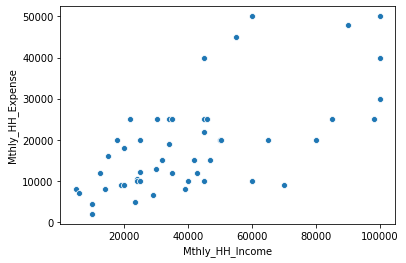

In [106]:
# Checking the kind of relationship between the two columns by plotting scatterplot

sns.scatterplot(x=df["Mthly_HH_Income"],y=df["Mthly_HH_Expense"])

#### Finding Covariance of X,Y

In [107]:
#for X i.e., df["Mthly_HH_Income"]
def cov_X_Y(X,Y):
    Mean_x=sum(X)/len(X)
    x_xbar=[x-Mean_x for x in X]
    #for Y i.e., df["Mthly_HH_Expense"]

    Mean_y=sum(Y)/len(Y)
    y_ybar=[y-Mean_y for y in Y]

    a=[x*y for x,y in zip(x_xbar,y_ybar)]
    Cov_X_Y=(sum(a))/(len(y_ybar)-1)
    return Cov_X_Y

In [108]:
cov_X_Y(df["Mthly_HH_Income"],df["Mthly_HH_Expense"])

204846485.7142857

In [109]:
cov_X_Y(df["Mthly_HH_Income"],df["Mthly_HH_Expense"])

204846485.7142857

In [110]:
# Inbuilt method to verify
df.cov()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,6.811009e+08,2.048465e+08,17753.591837,6.022980e+06,8.106864e+09,6666.653061
Mthly_HH_Expense,2.048465e+08,1.461733e+08,11735.632653,3.058257e+07,2.288330e+09,2769.102041
No_of_Fly_Members,1.775359e+04,1.173563e+04,2.302449,8.126531e+02,2.093019e+05,0.665714
Emi_or_Rent_Amt,6.022980e+06,3.058257e+07,812.653061,3.895551e+07,5.426263e+06,-446.530612
Annual_HH_Income,8.106864e+09,2.288330e+09,209301.854694,5.426263e+06,1.024869e+11,69741.266939
No_of_Earning_Members,6.666653e+03,2.769102e+03,0.665714,-4.465306e+02,6.974127e+04,0.539184


In [111]:
def corr(X,Y):
    covXY=cov_X_Y(X,Y)
    std_X=std(X)
    std_Y=std(Y)
    corX_Y=covXY/(std_X*std_Y)
    return corX_Y

In [112]:
corr(df["Mthly_HH_Income"],df["Mthly_HH_Expense"])

0.6492152549316461

In [113]:
#Also
from scipy.stats import pearsonr
x = df["Mthly_HH_Income"].tolist()
y = df["Mthly_HH_Expense"].tolist()
corr , _ = pearsonr(x,y)
print(f'The Pearson Correlation between Monthly Income and Expense is {"%.4f" % corr} ')

The Pearson Correlation between Monthly Income and Expense is 0.6492 


In [114]:
# Inbuilt method to verify
df.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


# Normal Distribution

Normal distribution is also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.


### Features of Normal Distribution
             
   ***In normal distributation The mean, mode and median are all equal.***
   
-  They’re all bell curves symmetric at centre (i.e. around the mean, μ). The Gaussian distribution cannot model skewed distributions.
-  Exactly half of the values are to the left of center and exactly half the values are to the right.
-  The total area under the curve is 1.
-  The skewness for Normal distribution is 0.
-  The kurtosis for Normal distribution is 3.
-  The Empirical Rule allows to determine the proportion of values that fall within certain distances from the mean.

 >**Empirical rule for the normal distribution:** The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean. Three-sigma limits that follow the empirical rule are used to set the upper and lower control limits in statistical quality control charts and in risk analysis such as VaR, i.e., Value-at-risk.
 
**The empirical rule is used often in statistics for forecasting final outcomes. After calculating the standard deviation and before collecting exact data, this rule can be used as a rough estimate of the outcome of the impending data to be collected and analyzed.**
 
![Empirical-rule-FINAL.jpg](https://pbs.twimg.com/media/E3ccVByXEAEUmGU.jpg)

### The Probability Density Function (PDF) for Normal Distribution:

$$f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

$$f(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{z^2}{2}}$$

$$z=\frac{(X-\mu)}{\sigma}$$
                     

**Read more:**
1. https://statisticsbyjim.com/basics/normal-distribution/
2. https://www.investopedia.com/terms/e/empirical-rule.asp

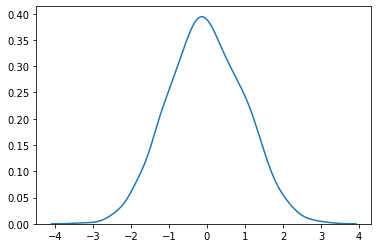

In [115]:
example = np.random.normal(size=2000)
sns.distplot(example , hist = False);

# Log-Normal Distribution

> A **lognormal (log-normal or Galton) distribution** is a probability distribution with a normally distributed logarithm. A random variable is lognormally distributed if its logarithm is normally distributed.

![lognormal](https://www.investopedia.com/thmb/FEQYc8RFuYtQ9GIbRFaqyu1Jww4=/2316x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/LognormalandNormalDistribution2_2-5dd2dde6dd3243cbbc1b6d995db3f0d6.png)


**Read more:**
1. https://www.investopedia.com/terms/l/log-normal-distribution.asp
2. https://www.statisticshowto.com/lognormal-distribution/
3. https://www.investopedia.com/articles/investing/102014/lognormal-and-normal-distribution.asp


# Pareto Distribution

>**Pareto distribution** is a power-law probability distribution named after Italian civil engineer, economist, and sociologist Vilfredo Pareto, that is used to describe social, scientific, geophysical, actuarial and various other types of observable phenomenon. Pareto distribution is sometimes known as the Pareto Principle or ‘80–20’ rule, as the rule states that 80% of society’s wealth is held by 20% of its population. Pareto distribution is not a law of nature, but an observation. It is useful in many real-world problems. It is a skewed heavily tailed distribution.

![pareto](https://miro.medium.com/max/633/1*_4tmuERisoc-5WHtl1mu6A.png)

Read more:
1. https://www.statisticshowto.com/pareto-distribution/
2. https://towardsdatascience.com/generating-pareto-distribution-in-python-2c2f77f70dbf

## Central Limit Theorem

>The **Central Limit Theorem** is one of the most important theorems in statistical theory. It states that when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

# Positively Skewed & Negatively Skewed Normal Distribution

>**Skewness** refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. **A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.**


**Measuring Skewness:**

There are several ways to measure skewness. Pearson’s first and second coefficients of skewness are two common ones. Pearson’s first coefficient of skewness, or Pearson mode skewness, subtracts the mode from the mean and divides the difference by the standard deviation. Pearson’s second coefficient of skewness, or Pearson median skewness, subtracts the median from the mean, multiplies the difference by three, and divides the product by the standard deviation.

$$Sk_1=\frac{X–Mo}{s}$$

$$Sk_2=\frac{3\bar{X}–Md}{s}$$

Where,
- $Sk_1$ and $Sk_2$ are Pearson’s first and second coefficient of skewness respectively
- $\bar{X}$ is the mean value
- Mo is the modal (mode) value
- Md is the median value
- s is the standard deviation for the sample

**Note: Pearson’s first coefficient of skewness is useful if the data exhibit a strong mode. If the data have a weak mode or multiple modes, Pearson’s second coefficient may be preferable, as it does not rely on mode as a measure of central tendency.**

 
**Read more:**
1. https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/
2. https://www.investopedia.com/terms/s/skewness.asp

# Effect on Mean, Median and Mode due to Skewness

![skewness](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/empirical-relation-between-mean-median-and-mode-1628764844.png)

In [116]:
df.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

In [117]:
df.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

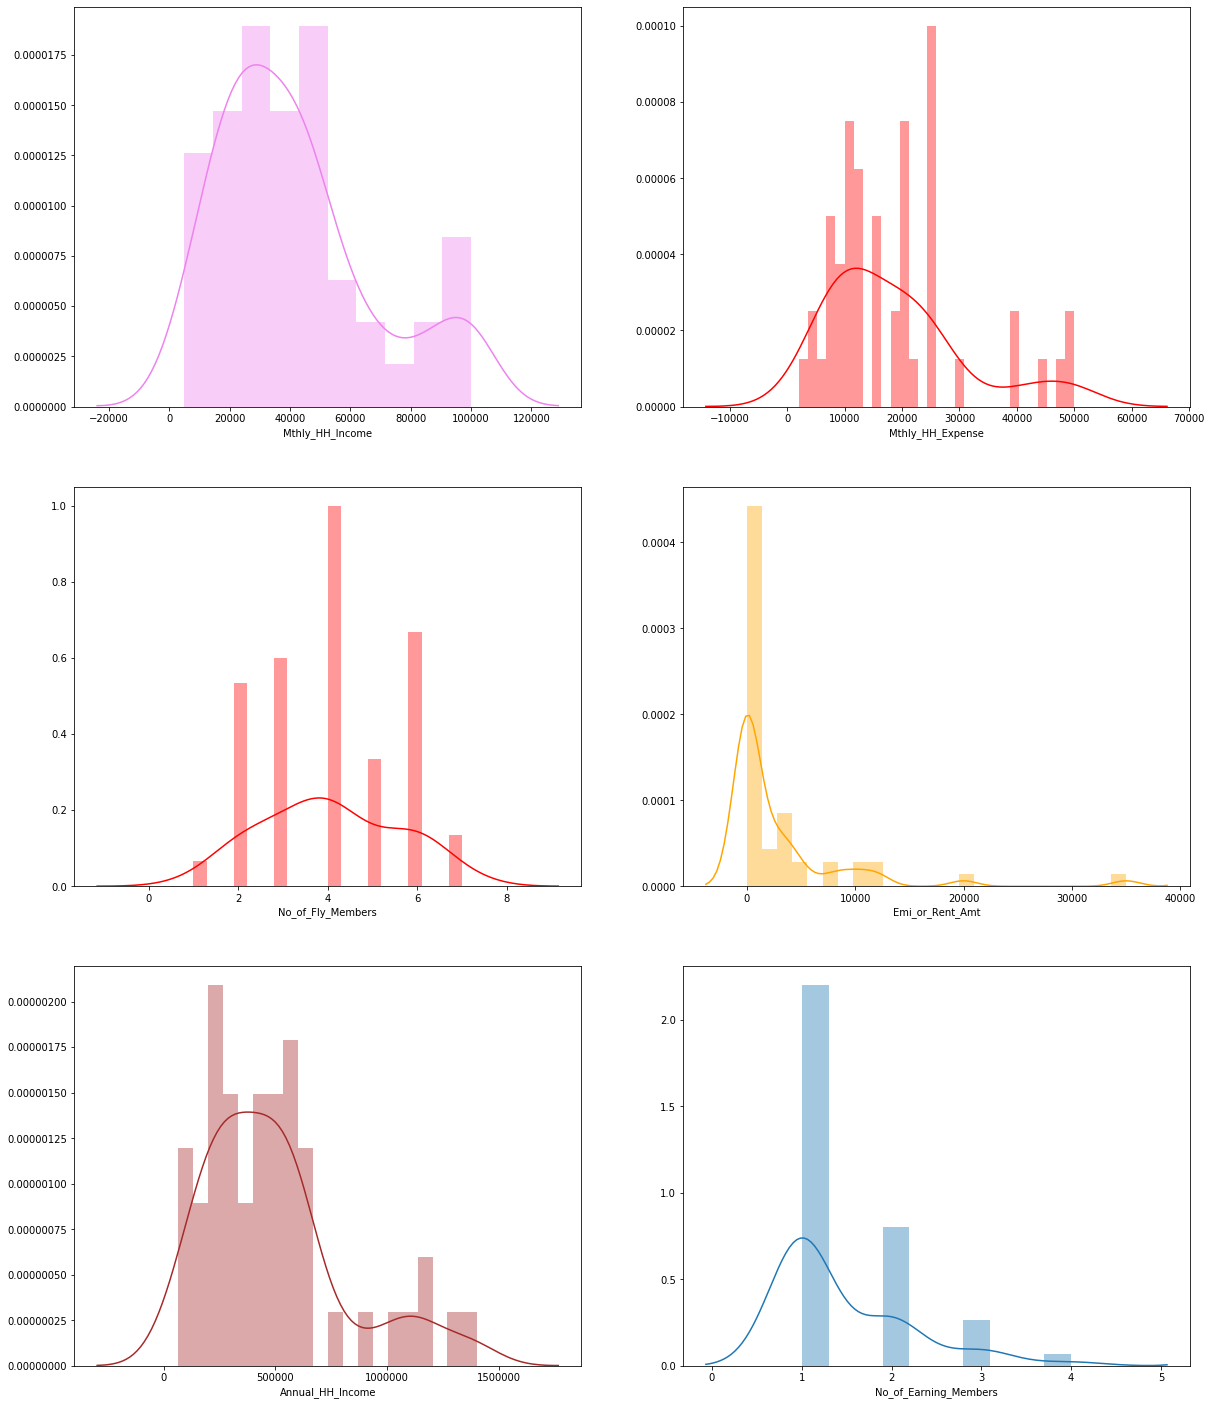

In [118]:
fig, axes = plt.subplots(3, 2,figsize=[20,25])
sns.distplot(df['Mthly_HH_Income'],bins=10,color='violet',kde=bool,ax=axes[0,0])
sns.distplot(df['Mthly_HH_Expense'],bins=30,color='red',kde=bool,ax=axes[0,1])
sns.distplot(df['No_of_Fly_Members'],bins=20,color='red',kde=bool,ax=axes[1,0])
sns.distplot(df['Emi_or_Rent_Amt'],bins=25,color='orange',kde=bool,ax=axes[1,1])
sns.distplot(df['Annual_HH_Income'],bins=20,color='brown',kde=bool,ax=axes[2,0])
sns.distplot(df['No_of_Earning_Members'],bins=10,kde=bool,ax=axes[2,1])
plt.show()

# QQ Plot

>**Q-Q(quantile-quantile)** plots play a very vital role to graphically analyze and compare two probability distributions such as a Gaussian Distribution, Uniform Distribution, Exponential Distribution or even Pareto Distribution, etc. by plotting their quantiles against each other. If the two distributions which we are comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x.


![qqplot0](https://miro.medium.com/max/640/1*_wuWDNGs3hB2K0_kgpoc1A.jpeg)
![qqplot1](https://miro.medium.com/max/875/1*aiUmkCQ5451VQa1JYXQioA.png)
![qqplot2](https://miro.medium.com/max/875/1*XGMMcZdBxPTK5K_MW7jNVA.png)
**Read more:**
1. https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0
2. https://www.statisticshowto.com/q-q-plots/

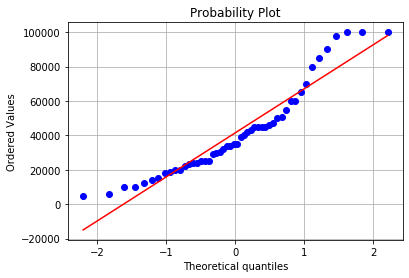

In [119]:
from scipy import stats

stats.probplot(df['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

# Box Cox Transformation

>A **Box Cox transformation** is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

**The Box-Cox transformation transforms our data so that it closely resembles a normal distribution.**

If w is our transformed variable and y is our target variable, then,

![boxcox](https://miro.medium.com/max/404/1*6Y67MRMCbr5b7hLKeSMxzA.jpeg)

where t is the time period and lambda is the parameter that we choose (you can perform the Box-Cox transformation on non-time series data, also).
Notice what happens when lambda equals 1. In that case, our data shifts down but the shape of the data does not change. Therefore, **if the optimal value for lambda is 1, then the data is already normally distributed, and the Box-Cox transformation is unnecessary.**

**Read more:**
1. https://www.statisticshowto.com/box-cox-transformation/
2. https://towardsdatascience.com/box-cox-transformation-explained-51d745e34203


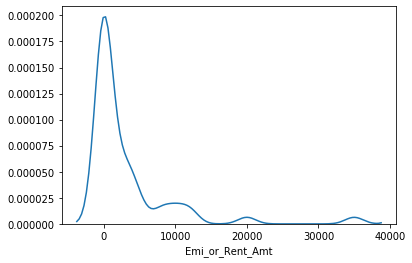

In [120]:
from scipy.stats import boxcox 
sns.distplot(df['Emi_or_Rent_Amt'], hist=False, kde=True);

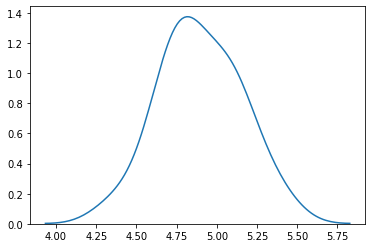

In [121]:
# converting the data to normally distributed
transformed_data, best_lambda = boxcox(df[df['Emi_or_Rent_Amt']>0]['Emi_or_Rent_Amt']) 

sns.distplot(transformed_data, hist=False, kde=True);